## Examen final - 13/05/2024

### Ejercicio 1

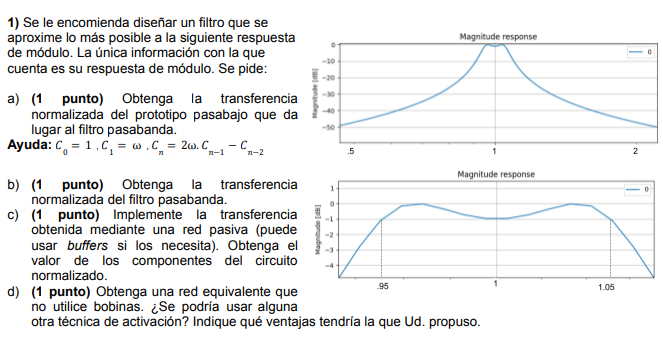

En el caso de este ejercicio, se adjunta el desarrollo completo manuscrito y luego se vuelve a trabajar, sección por sección descripto en Markdown y simulado

##### Desarrollo tradicional

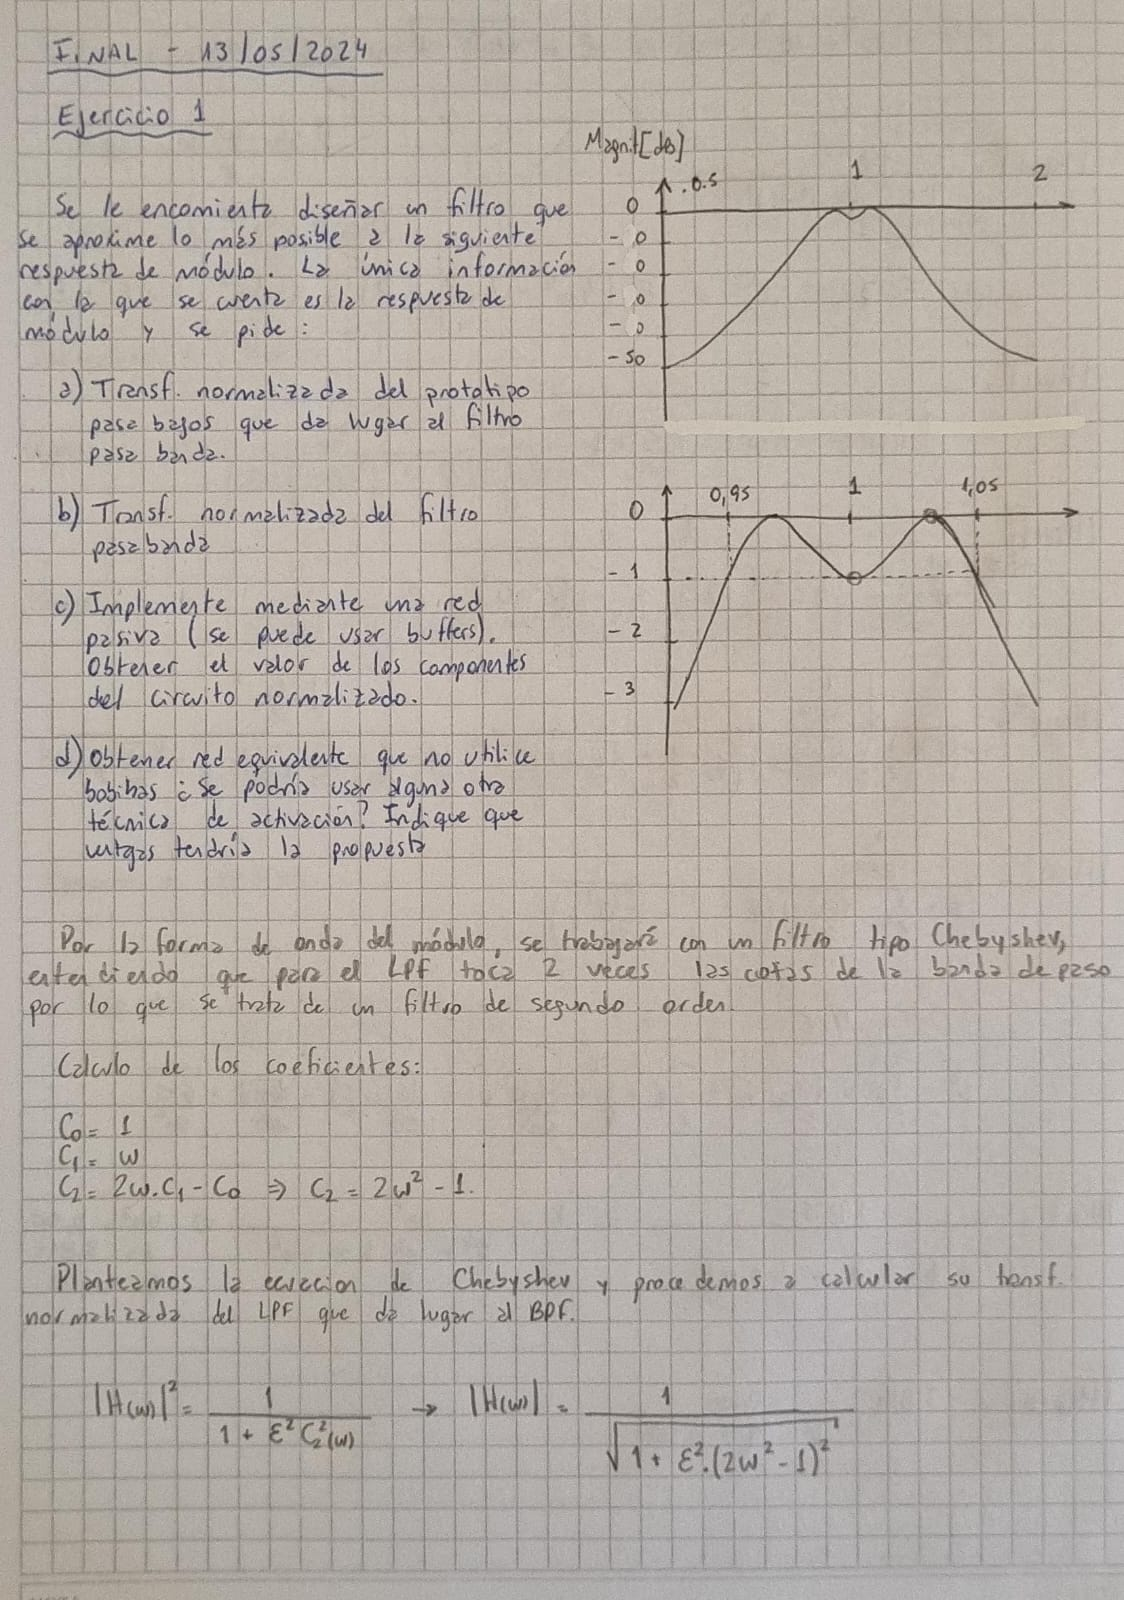

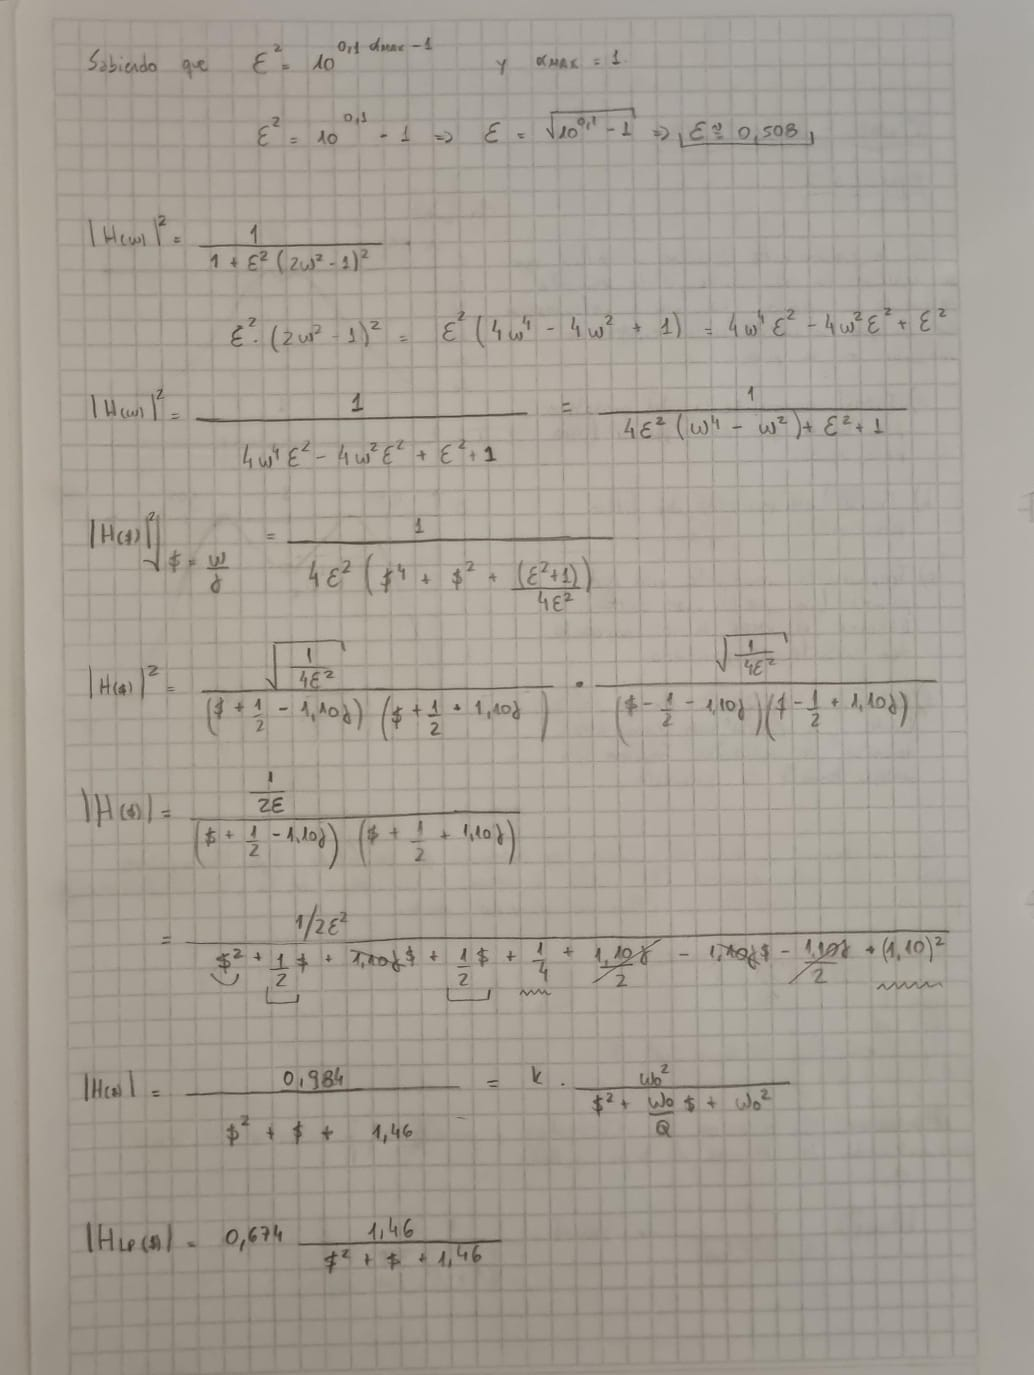

Epsilon: 0.5088471399095875


<IPython.core.display.Math object>

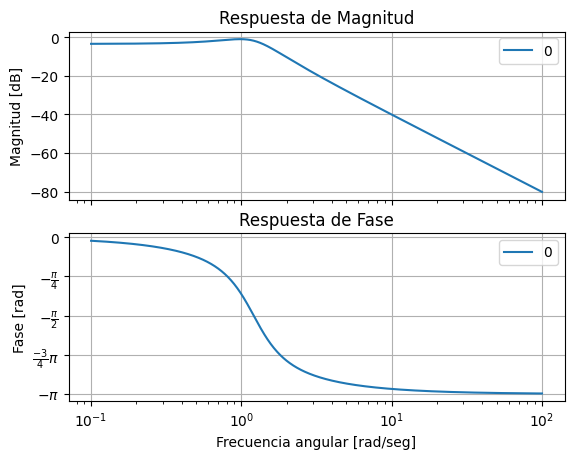

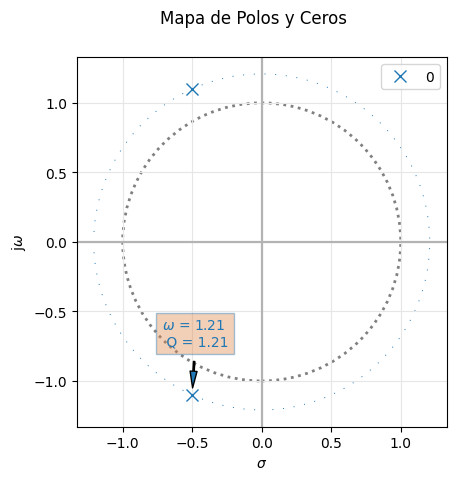

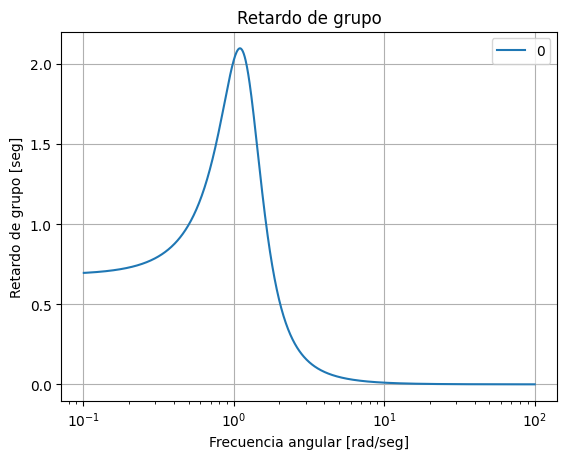

In [2]:
import numpy as np
from pytc2.sistemas_lineales import tf2sos_analog, analyze_sys, pretty_print_SOS
import scipy.signal as sig
import math
import warnings
warnings.filterwarnings('ignore')

epsilon = math.sqrt(10**0.1 - 1)
print("Epsilon: " + str(epsilon))

# Definición de una implementación de analyze_sys para evitar logueos innecesarios, mejorando la prolijidad.
def analyze_sys_silent(all_sys, sys_name=None, img_ext='none', same_figs=True, annotations=True, xaxis='omega', fs=2*np.pi):
    analyze_sys(all_sys, sys_name=None, img_ext='none', same_figs=True, annotations=True, xaxis='omega', fs=2*np.pi)
    return

# Con los datos definidos anteriormente, se arman los array de la transferencia.
num_lp = np.array([0, 0, 0.984])
den_lp = np.array([1, 1, 1.46])
tf_bicuad_sos = tf2sos_analog( num_lp, den_lp )


# Imprimir en formato latex la transferencia
pretty_print_SOS(tf_bicuad_sos, mode='omegayq')

# Plotear de forma silenciosa las características de mi función 
analyze_sys_silent([sig.TransferFunction(num_lp,den_lp)], 'mi_bicuad', same_figs=False)

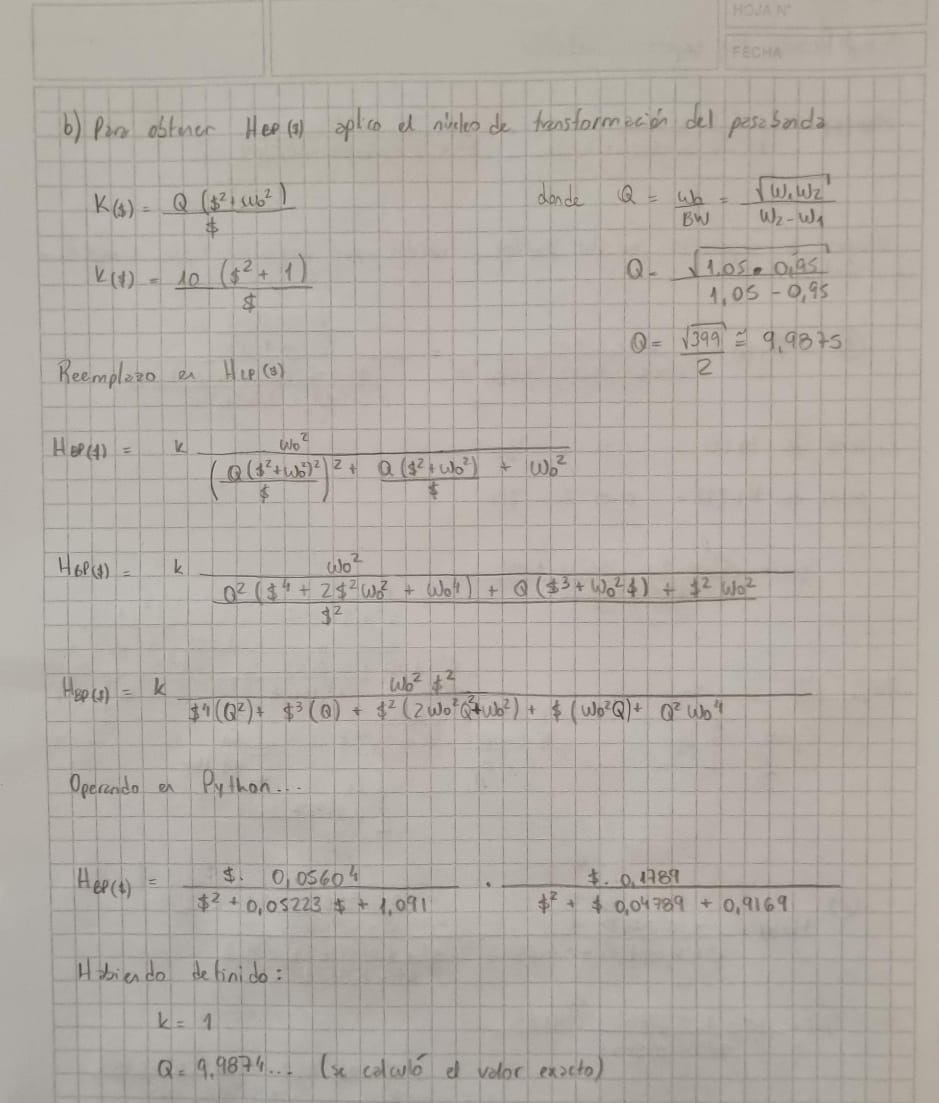

Q = 9.98749217771908


Expresión final dividida en dos pasa banda de segundo orden:


<IPython.core.display.Math object>

<IPython.core.display.Math object>


Comparación entre expresión calculada y obtenida mediante lp2bp

Expresión final de cuarto orden:


<IPython.core.display.Math object>

Expresión obtenida mediante sig.lp2bp:


<IPython.core.display.Math object>

Text(0.5, 0.98, 'Valores LP2BP')

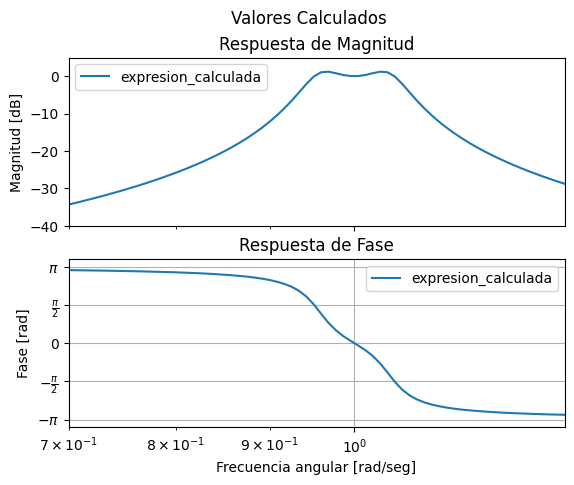

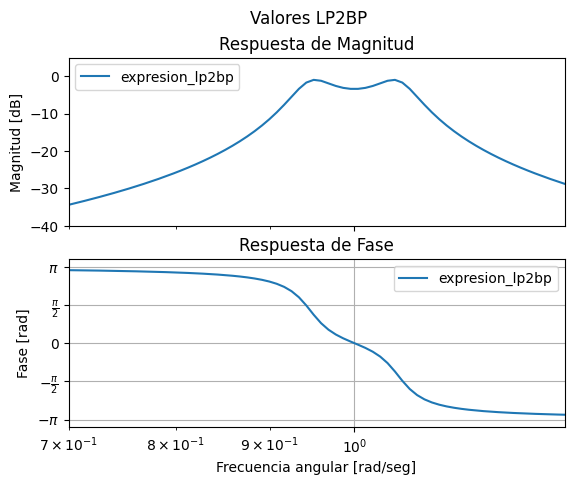

In [5]:
import matplotlib.pyplot as plt
import math
from pytc2.sistemas_lineales import tf2sos_analog, analyze_sys, pretty_print_SOS, pretty_print_lti
import scipy.signal as sig



# Definición de una implementación de analyze_sys para evitar logueos innecesarios, mejorando la prolijidad.
def analyze_sys_silent(all_sys, sys_name=None, img_ext='none', same_figs=True, annotations=True, xaxis='omega', fs=2*np.pi):
    analyze_sys(all_sys, sys_name=None, img_ext='none', same_figs=True, annotations=True, xaxis='omega', fs=2*np.pi)
    return

w_0 = 1.0
w1 = 0.95
w2 = 1.05

Q = (math.sqrt(w1*w2)/(w2-w1))
print("Q = " + str(Q) + "\n")

# Calculamos los coeficientes del denominador para mayor claridad.
A = Q**2
B = Q
C = ((2 * w_0**2 * Q**2) + (w_0**2))
D = w_0**2 * Q
E = Q**2 * w_0**4

# Con los datos definidos anteriormente, se arman los array de la transferencia.
num = np.array([0, 0, w_0**2, 0, 0])
den = np.array([A, B, C, D, E])
tf_bicuad_sos = tf2sos_analog( num, den )

# Imprimir en formato latex la transferencia
print("\nExpresión final dividida en dos pasa banda de segundo orden:")
pretty_print_SOS(tf_bicuad_sos, mode="omegayq")
pretty_print_SOS(tf_bicuad_sos)

print("\nComparación entre expresión calculada y obtenida mediante lp2bp")
print("\nExpresión final de cuarto orden:")
pretty_print_lti(num, den)

print("Expresión obtenida mediante sig.lp2bp:")
num_bp, den_bp = sig.lp2bp(num_lp, den_lp, wo=1.0, bw=1/Q)
pretty_print_lti(num_bp, den_bp)


# Plotear de forma silenciosa las características de mi función 
asy_axes = analyze_sys([sig.TransferFunction(num,den)], 'expresion_calculada', same_figs=False)


# el caracter "_" descarta la salida de la función
# cerramos todas las visualizaciones salvo la respuesta en frecuencia
plt.close(2)
plt.close(3)
plt.close(4)


plt.sca(asy_axes[0][1][0])
max_ripple = np.max(np.array(1))

x_min = 0.7
x_max = 1.3
y_min = -40.0
y_max = 5.0

plt.axis([x_min, x_max, y_min, y_max])
plt.grid()
plt.suptitle('Valores Calculados')

# Aquí trabajaremos con la función calculada con LP2BP
asy_axes_bp = analyze_sys([sig.TransferFunction(num_bp,den_bp)], 'expresion_lp2bp', same_figs=False)
plt.close(2)
plt.close(3)
plt.close(4)
plt.sca(asy_axes_bp[0][1][0])
max_ripple = np.max(np.array(1))

x_min = 0.7
x_max = 1.3
y_min = -40.0
y_max = 5.0

plt.axis([x_min, x_max, y_min, y_max])
plt.grid()
plt.suptitle('Valores LP2BP')

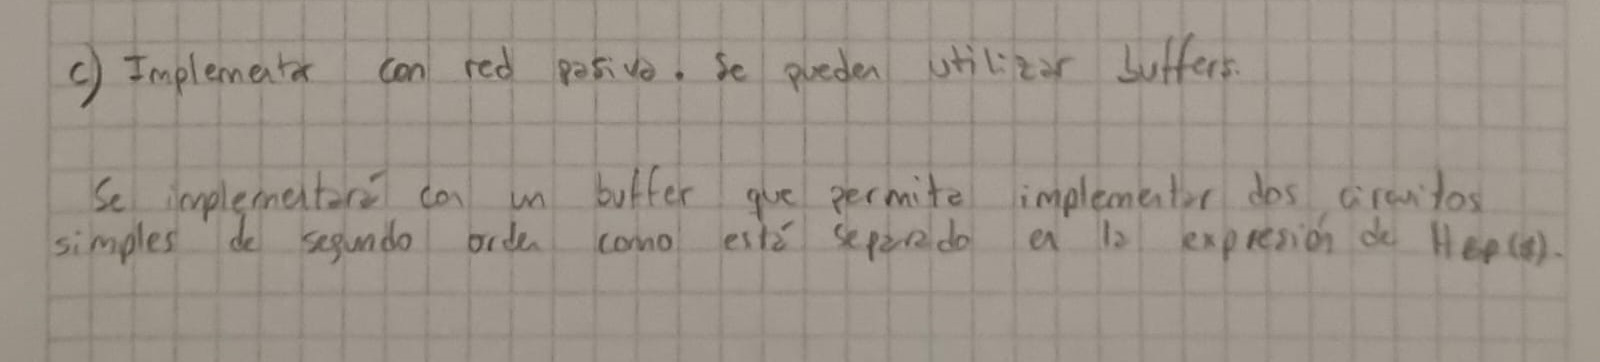

## item C -> Sintetizar red pasiva

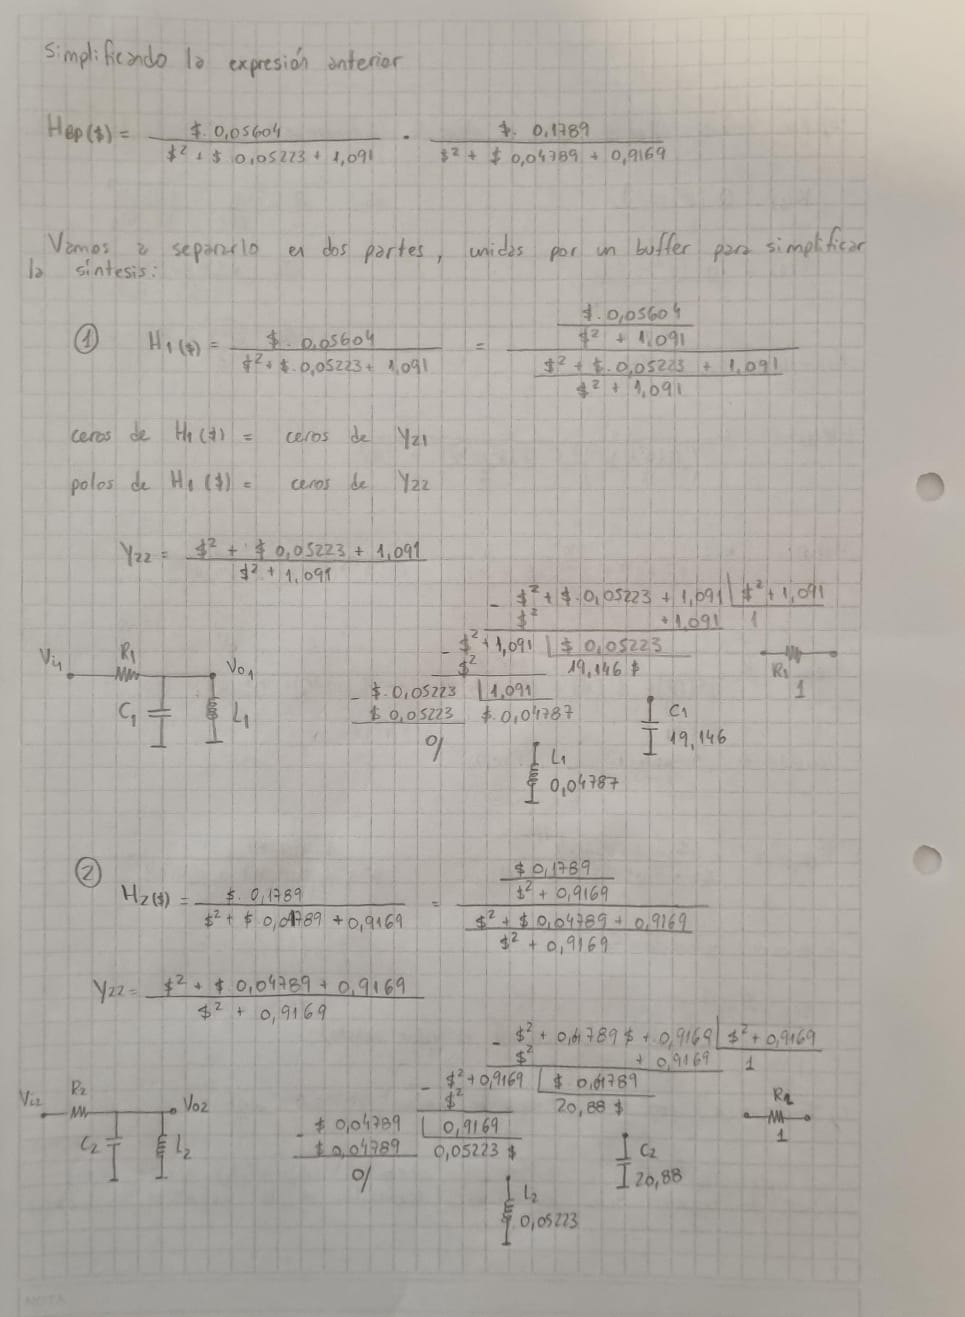
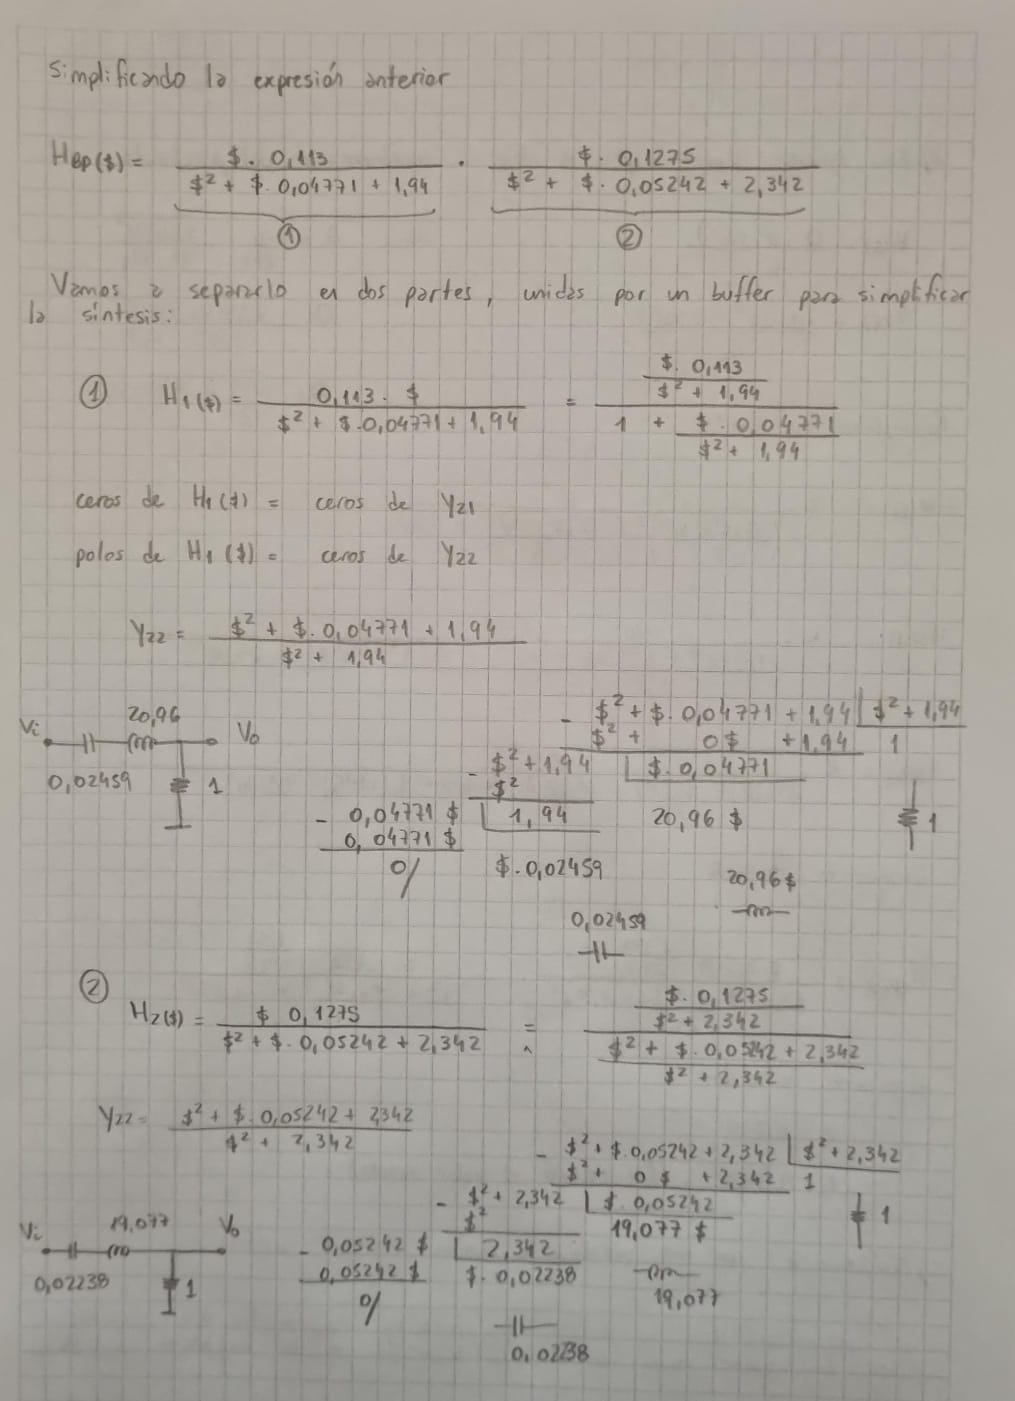

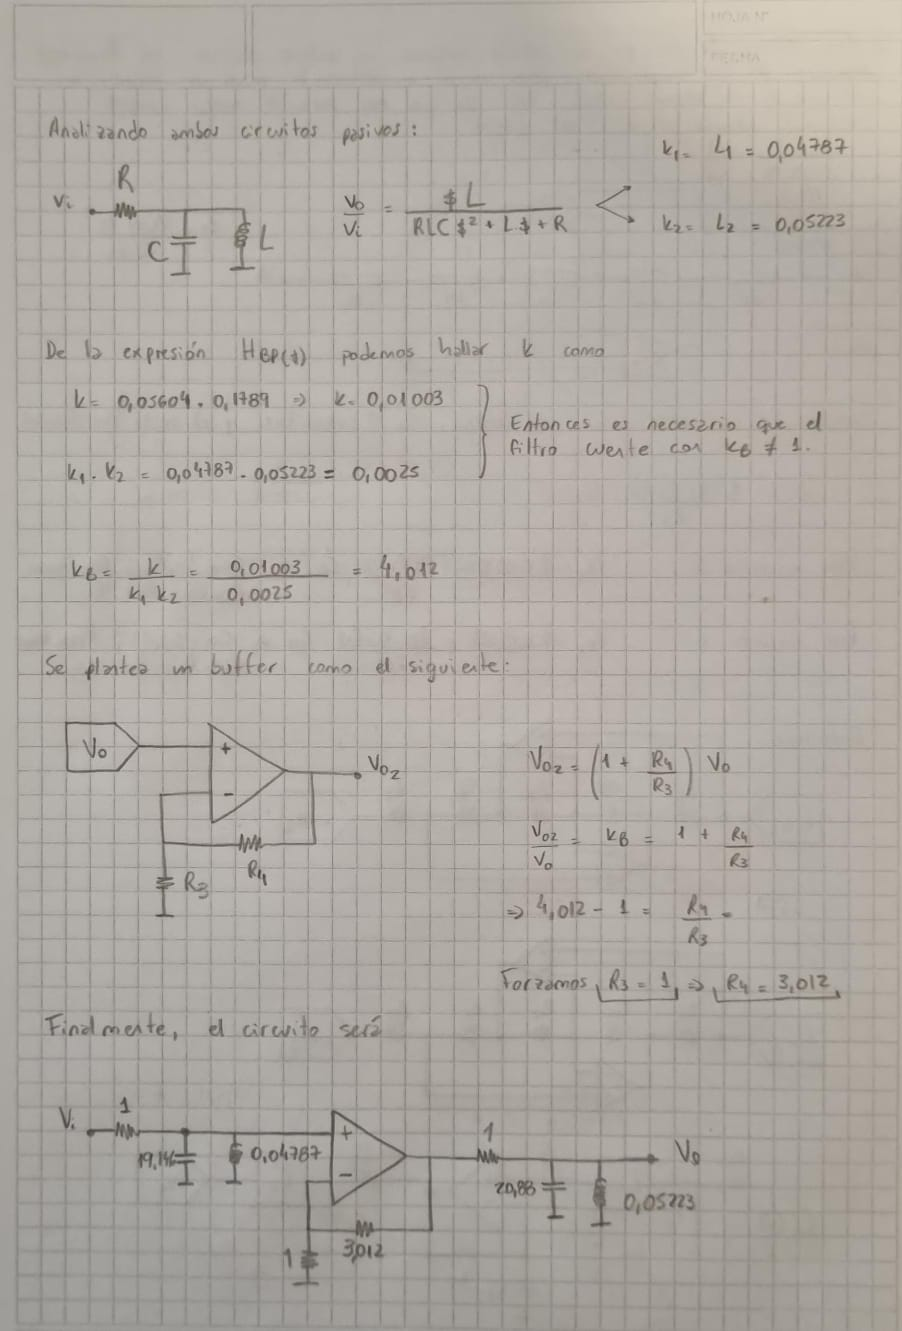
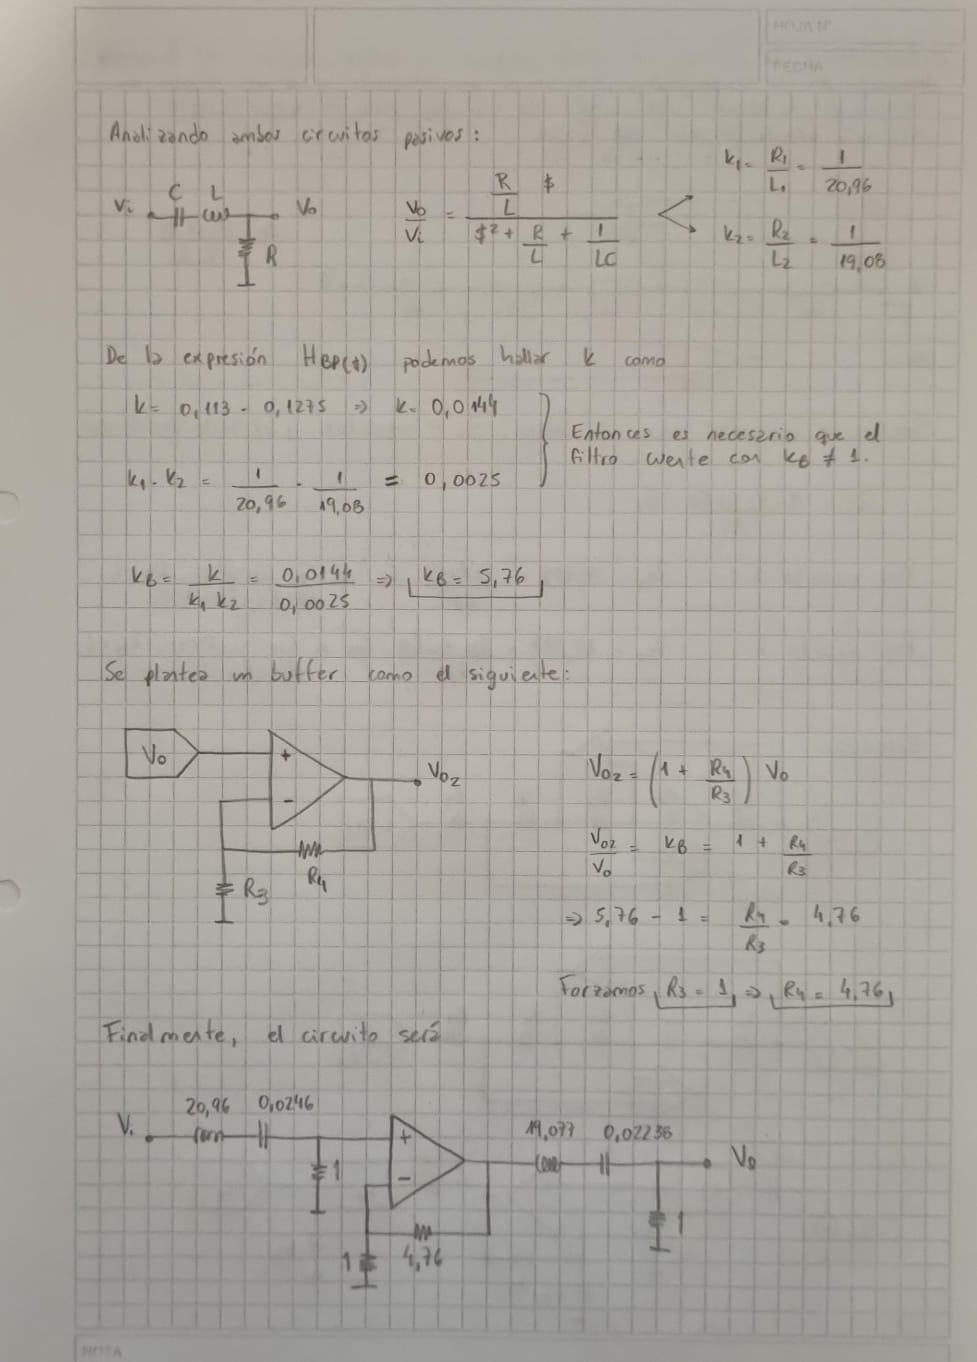

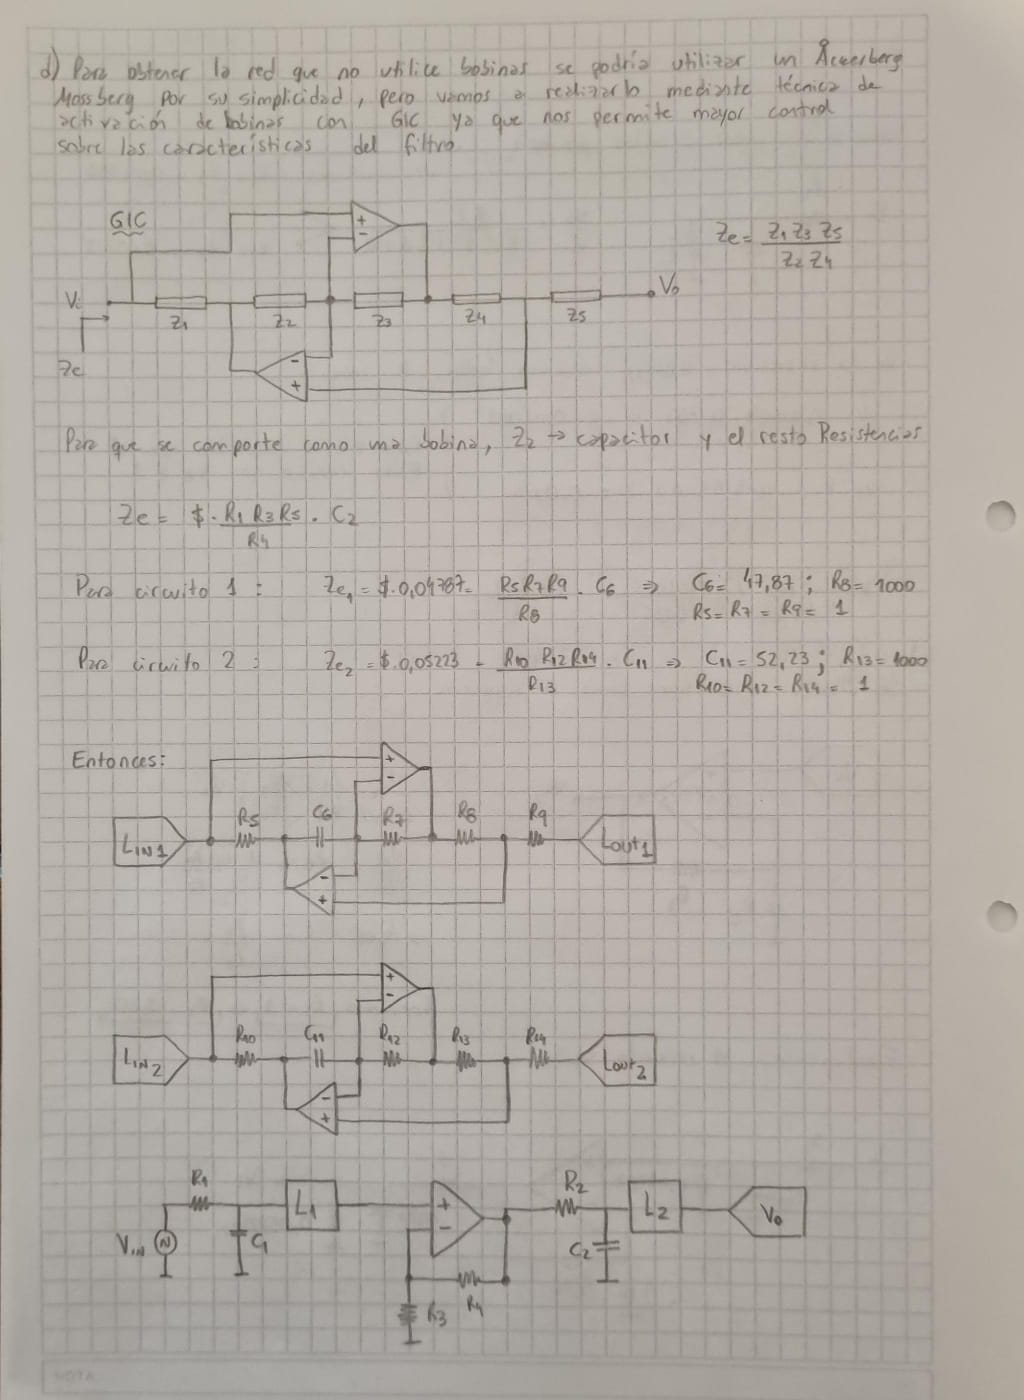
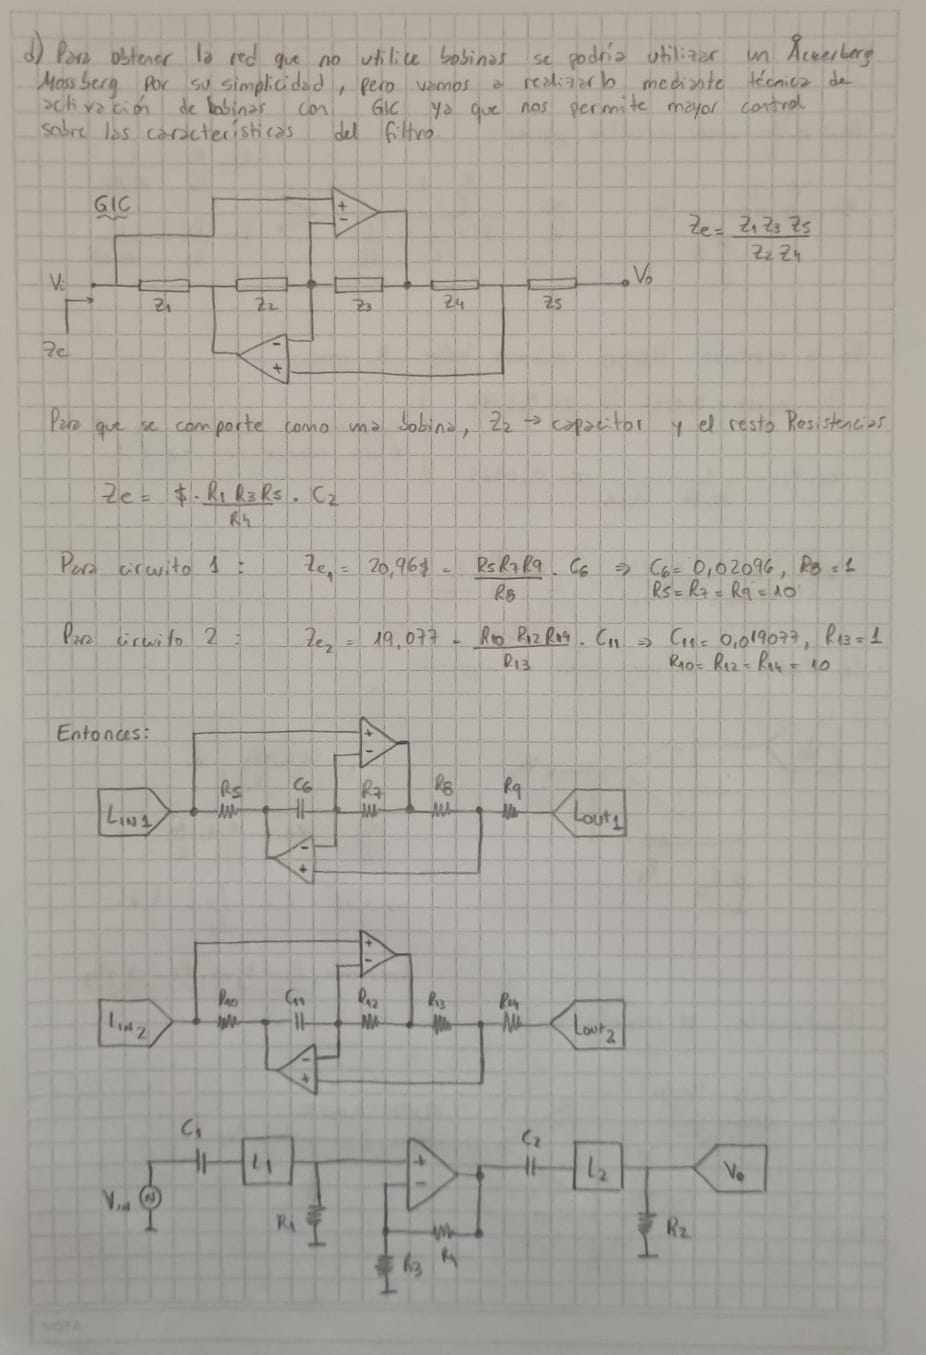

### Simulación con LTSpice

#### Item C

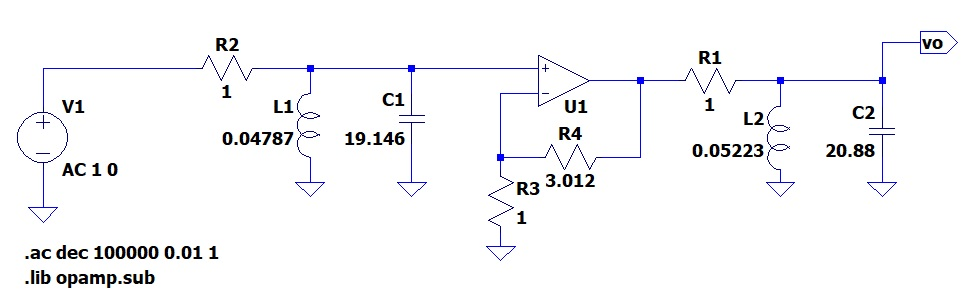

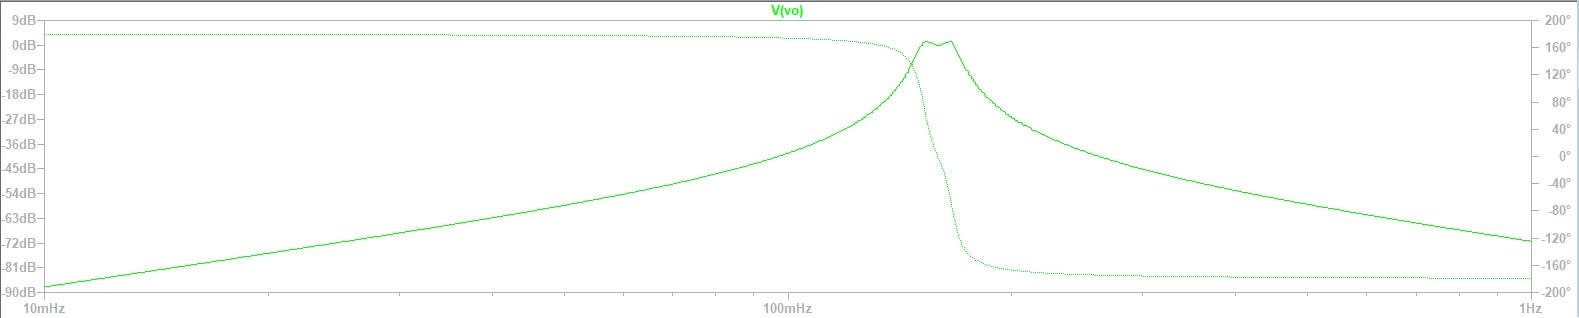

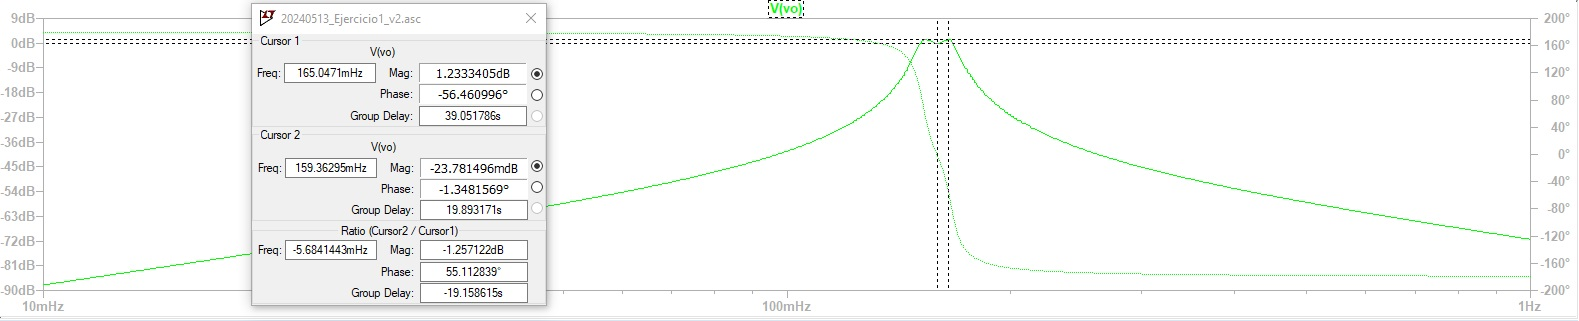

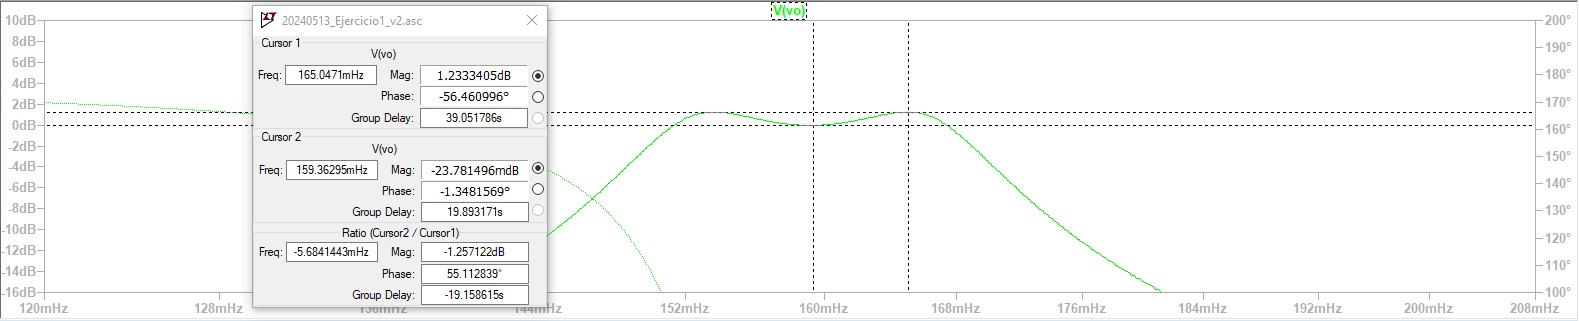

#### Item D

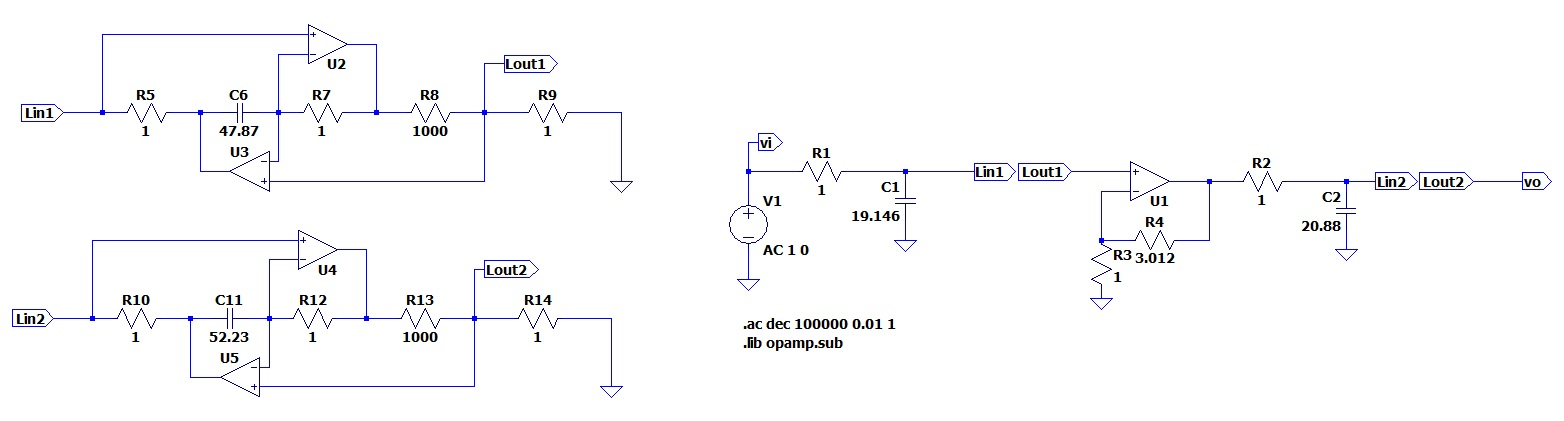

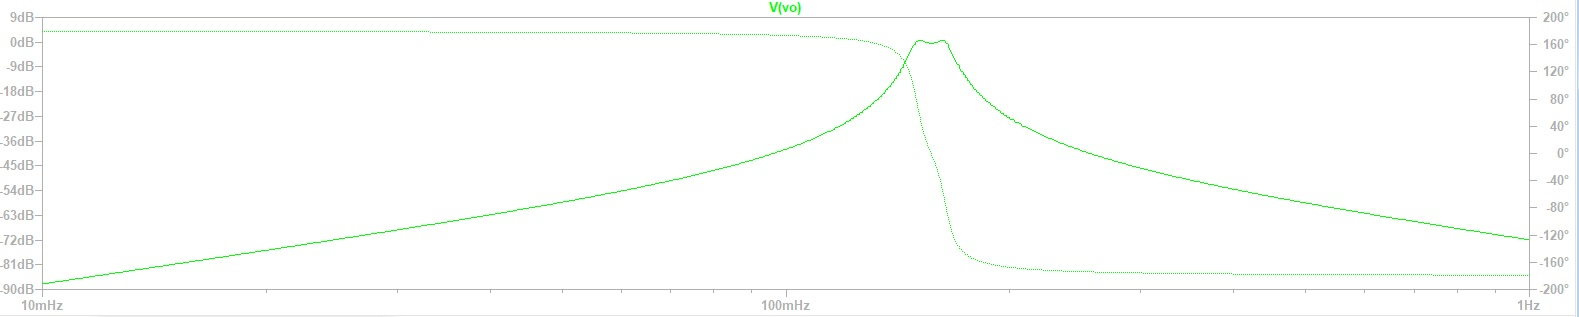

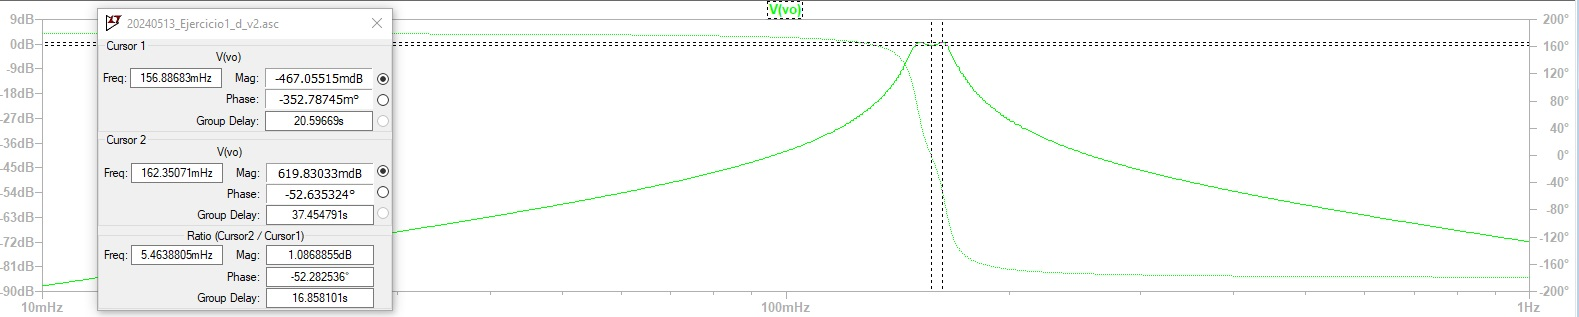

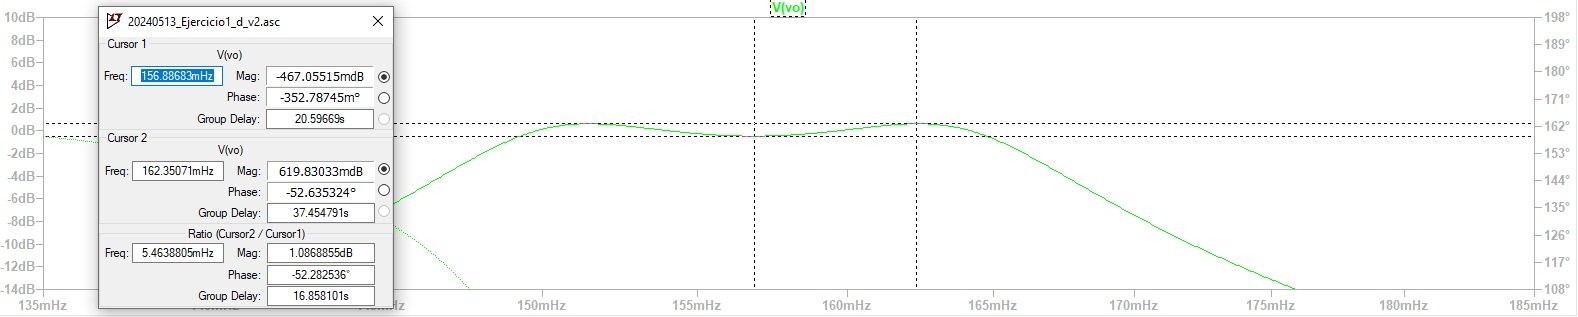